In [1]:
import os
import graphviz
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
import matplotlib.pyplot as plt

# Display the updated DataFrame in the notebook
from IPython.display import display

random_seed = 42
data_folder = 'data'

### Load the data

In [2]:
# load the dataframe from pickle files
select_properties_df = pd.read_pickle(os.path.join(data_folder, 'Select_properties.pkl'))
yields_df = pd.read_pickle(os.path.join(data_folder, 'Yields.pkl'))
yield_data_df = pd.read_pickle(os.path.join(data_folder, 'yield_data_df.pkl'))
select_properties_data_df = pd.read_pickle(os.path.join(data_folder, 'select_properties_data_df.pkl'))
select_properties_data_removed_highlycorr_df = pd.read_pickle(os.path.join(data_folder, 'select_properties_data_removed_highlycorr_df.pkl'))

### Normalize the data

In [3]:
# perform normalization on the properties dataframe
from sklearn.preprocessing import StandardScaler, PowerTransformer, QuantileTransformer, RobustScaler

scaler = StandardScaler()
# scaler = PowerTransformer(method='yeo-johnson', standardize=True, copy=True)
# scaler = QuantileTransformer(n_quantiles=4, output_distribution='normal', ignore_implicit_zeros=False, subsample=100000, random_state=None, copy=True)
# scaler = RobustScaler(quantile_range=(25.0, 75.0), copy=True, with_centering=True, with_scaling=True)

scaler.fit(select_properties_data_removed_highlycorr_df)
select_properties_data_removed_highlycorr_normalized = scaler.transform(select_properties_data_removed_highlycorr_df)
select_properties_data_removed_highlycorr_normalized_df = pd.DataFrame(select_properties_data_removed_highlycorr_normalized, columns=select_properties_data_removed_highlycorr_df.columns)

In [4]:
# plot a bar chart of the normalized "BDE (kcal/mol)" column
# sort the values based on the normalized "BDE (kcal/mol)" column in descending order
sorted_compounds = select_properties_df.sort_values("BDE (kcal/mol)")
X = sorted_compounds["Compound_Name"]
Y = select_properties_data_removed_highlycorr_normalized_df["BDE (kcal/mol)"]
fig = px.bar(
    x=X,
    y=Y.sort_values(),
    labels={"x": "Molecule", "y": "Normalized BDE (kcal/mol)"},
)
fig.update_xaxes(tickvals=select_properties_df["Compound_Name"], title_text="Molecule")
    
fig.update_layout(
    title="Normalized BDE (kcal/mol) by Compound",
    height=len(Y) * 20,
    width=len(X) * 30,
    template="plotly_white",
    xaxis=dict(tickangle=30),
)

# Show the chart
fig.show()

In [5]:
# Calculate correlation
properties_columns = select_properties_data_removed_highlycorr_df.columns
yield_columns = yields_df.select_dtypes(include=[np.number]).columns

correlation_results = pd.DataFrame(index=properties_columns, columns=yield_columns)
for property in properties_columns:
    for method in yield_columns:
        correlation_results.loc[property, method] = select_properties_data_removed_highlycorr_normalized_df[property].corr(yield_data_df[method])
correlation_results = correlation_results.astype(float)

In [6]:
correlation_results

,Britton,Maity2AP Stahl,Maity4AP Stahl,Golden Stahl,DeLuca,Fujisaki,Newkome,Xu Zhang,Schreiner,Chen,Wu,Lopez Stahl,Ariarfard,Kanai
BDE (kcal/mol),0.516042,-0.220016,-0.330671,-0.448525,0.338140,-0.046801,-0.164182,-0.314159,0.252607,0.091495,-0.222955,-0.471337,-0.582487,0.040445
E_spc (Hartree),0.119660,-0.157289,-0.555508,-0.078058,-0.013765,0.065980,-0.077700,-0.471281,-0.115254,0.090693,0.234323,-0.133786,-0.469489,0.032579
HOMO_Boltz,-0.088034,-0.008372,0.375200,0.129522,0.204096,0.101971,-0.014424,0.230340,0.177760,-0.267462,-0.449376,0.039719,0.360435,-0.146796
HOMO_Boltz_anion,-0.215723,-0.376680,-0.523941,0.363764,-0.019528,0.136415,-0.161843,-0.600607,-0.193957,-0.218311,-0.030322,0.020836,-0.275478,-0.122178
HOMO_Boltz_openshell,-0.386869,-0.027282,0.106457,0.529533,-0.093403,-0.031808,0.024908,-0.023675,-0.118777,-0.386984,-0.198668,0.302141,0.408596,-0.162257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C2_Co-Valency_Boltz_anion,-0.362789,0.045125,0.104313,0.314148,-0.051636,0.177241,0.169858,0.033936,-0.210820,-0.023505,0.066336,0.123296,0.321108,-0.167300
C2_Electro-Valency_Boltz,0.270751,0.189855,0.134546,-0.333013,-0.061360,-0.333716,0.026603,0.209635,0.189483,0.098081,-0.024245,-0.078872,-0.030615,0.128637
C2_Electro-Valency_Boltz_anion,0.370589,-0.000236,0.018456,-0.336695,0.128409,-0.169960,-0.136262,0.077895,0.266619,-0.007020,-0.110315,-0.146226,-0.242892,0.188391
C2_FormalCharge_Boltz,0.200074,0.089700,-0.011216,0.042615,0.129785,0.112627,-0.068389,0.075714,0.037320,-0.151810,0.006359,-0.139058,0.146676,0.201589


In [7]:
# Identify the top 2 important factors (positive or negative) for each method
top_factors_dict = {}

for method in correlation_results.columns:
    # Sort factors by absolute correlation values and select top 3
    top_factors = correlation_results[method].abs().sort_values(ascending=False).head(3).index.tolist()
    top_factors_dict[method] = top_factors

top_factors_dict

{'Britton': ['BDE (kcal/mol)',
  'NBO_charge_C1_Boltz',
  'C1_Electro-Valency_Boltz'],
 'Maity2AP Stahl': ['C1_C2_bond_order_ionic_Boltz_anion',
  'NMR_shift_C2_Boltz',
  'C1_C2_bond_order_ionic_Boltz'],
 'Maity4AP Stahl': ['Sterimol_B5_C1_C2(amstrong)_morfeus_Boltz',
  'E_spc (Hartree)',
  'Sterimol_B1_C1_C2(amstrong)_morfeus_Boltz_anion'],
 'Golden Stahl': ['C1_FormalCharge_Boltz',
  'HOMO_Boltz_openshell',
  'mu_Boltz_openshell'],
 'DeLuca': ['C1_Co-Valency_Boltz_anion',
  '%Vbur_C1_2.0amstrong_Boltz_anion',
  'NBO_charge_C1_Boltz'],
 'Fujisaki': ['dipole(Debye)_Boltz_openshell',
  'dipole(Debye)_Boltz',
  'C2_Co-Valency_Boltz'],
 'Newkome': ['C1_C2_bond_order_covalent_Boltz_anion',
  'C1_C2_bond_order_total_Boltz_anion',
  'dipole(Debye)_Boltz'],
 'Xu Zhang': ['HOMO_Boltz_anion',
  'C1_Electro-Valency_Boltz_anion',
  'E_spc (Hartree)'],
 'Schreiner': ['NMR_shift_C2_Boltz',
  'pyramidalization_Gavrish_C1(degree)_Boltz',
  'Sterimol_B1_C1_C2(amstrong)_morfeus_Boltz'],
 'Chen': ['mu_B

In [8]:
import plotly.express as px

# Create bar charts for each method
for method, factors in top_factors_dict.items():
    # Prepare data for the chart
    data = correlation_results.loc[factors, method].reset_index()
    data.columns = ["Factor", "Correlation"]
    data["Absolute Correlation"] = data["Correlation"].abs()

    # Create the bar chart
    fig = px.bar(
        data,
        x="Factor",
        y="Absolute Correlation",
        text="Correlation",  # Add original correlation values as text
        title=f"Top 3 Factors for {method}",
        labels={"Absolute Correlation": "Correlation Value (|r|)", "Factor": "Property"},
    )

    # Customize layout
    fig.update_traces(texttemplate="%{text:.2f}", textposition="inside")  # Format text
    fig.update_layout(
        height=500,
        width=800,
        template="plotly_white",
        xaxis_title="Factors",
        yaxis_title="Abs Correlation",
    )

    # Show the chart
    fig.show()

In [9]:
import plotly.express as px

# Prepare a matrix with only top 5 factors for each method
filtered_matrix = correlation_results.copy()
filtered_matrix[:] = 0  # Initialize with zeros

for method, factors in top_factors_dict.items():
    # Retain only the top 5 factors
    filtered_matrix.loc[factors, method] = correlation_results.loc[factors, method]

# Plot the 2D matrix
fig = px.imshow(
    filtered_matrix.T,
    labels={"x": "Property", "y": "Method", "color": "Correlation"},
    color_continuous_scale="RdBu",  # Diverging color scale
    title="Top 3 Factors for Each Method",
)

# Customize layout
fig.update_layout(
    height=len(filtered_matrix.columns) * 50,
    width=len(filtered_matrix) * 20,
    xaxis_title="Property",
    yaxis_title="Method Yields",
    template="plotly_white",
)

# Show the plot
fig.show()

In [10]:
# count how many times each factor is in the top 3
top_factors = pd.Series([factor for factors in top_factors_dict.values() for factor in factors])
top_factors_count = top_factors.value_counts()
top_factors_count

NMR_shift_C2_Boltz                                     3
dipole(Debye)_Boltz                                    3
BDE (kcal/mol)                                         2
C1_Electro-Valency_Boltz                               2
NBO_charge_C1_Boltz                                    2
mu_Boltz_openshell                                     2
E_spc (Hartree)                                        2
HOMO_Boltz_openshell                                   2
C1_C2_bond_order_ionic_Boltz                           2
C1_Electro-Valency_Boltz_anion                         2
distance_C1_C2(amstrong)_Boltz                         2
Sterimol_B1_C1_C2(amstrong)_morfeus_Boltz_anion        1
C1_C2_bond_order_ionic_Boltz_anion                     1
C1_Co-Valency_Boltz_anion                              1
C1_FormalCharge_Boltz                                  1
Sterimol_B5_C1_C2(amstrong)_morfeus_Boltz              1
dipole(Debye)_Boltz_openshell                          1
C2_Co-Valency_Boltz            

In [11]:
display(select_properties_data_df.head(1))
display(select_properties_data_removed_highlycorr_df.head(1))
display(select_properties_data_removed_highlycorr_normalized_df.head(1))

,BDE (kcal/mol),BDFE (kcal/mol),E_spc (Hartree),E_spc (Hartree)_anion,E_spc (Hartree)_openshell,H_spc(Hartree),H_spc(Hartree)_anion,H_spc(Hartree)_openshell,qh_G(T)_spc(Hartree),qh_G(T)_spc(Hartree)_anion,...,C1_Electro-Valency_Boltz,C1_Electro-Valency_Boltz_anion,C1_FormalCharge_Boltz,C1_FormalCharge_Boltz_anion,C2_Co-Valency_Boltz,C2_Co-Valency_Boltz_anion,C2_Electro-Valency_Boltz,C2_Electro-Valency_Boltz_anion,C2_FormalCharge_Boltz,C2_FormalCharge_Boltz_anion
0,90.96998,83.154355,-441.215801,-440.620459,-440.561375,-441.043098,-440.463017,-440.40235,-441.085759,-440.504702,...,0.6784,0.5491,0.0006,-0.2896,3.5377,3.4047,0.4177,0.5367,-0.0308,-0.0333


,BDE (kcal/mol),E_spc (Hartree),HOMO_Boltz,HOMO_Boltz_anion,HOMO_Boltz_openshell,LUMO_Boltz,LUMO_Boltz_anion,LUMO_Boltz_openshell,mu_Boltz,mu_Boltz_anion,...,C1_Electro-Valency_Boltz,C1_Electro-Valency_Boltz_anion,C1_FormalCharge_Boltz,C1_FormalCharge_Boltz_anion,C2_Co-Valency_Boltz,C2_Co-Valency_Boltz_anion,C2_Electro-Valency_Boltz,C2_Electro-Valency_Boltz_anion,C2_FormalCharge_Boltz,C2_FormalCharge_Boltz_anion
0,90.96998,-441.215801,-0.28447,-0.03713,-0.2444,-0.02605,0.14427,-0.02204,-0.15526,0.05357,...,0.6784,0.5491,0.0006,-0.2896,3.5377,3.4047,0.4177,0.5367,-0.0308,-0.0333


,BDE (kcal/mol),E_spc (Hartree),HOMO_Boltz,HOMO_Boltz_anion,HOMO_Boltz_openshell,LUMO_Boltz,LUMO_Boltz_anion,LUMO_Boltz_openshell,mu_Boltz,mu_Boltz_anion,...,C1_Electro-Valency_Boltz,C1_Electro-Valency_Boltz_anion,C1_FormalCharge_Boltz,C1_FormalCharge_Boltz_anion,C2_Co-Valency_Boltz,C2_Co-Valency_Boltz_anion,C2_Electro-Valency_Boltz,C2_Electro-Valency_Boltz_anion,C2_FormalCharge_Boltz,C2_FormalCharge_Boltz_anion
0,0.954868,-0.614314,0.968695,-0.849995,0.109182,-0.367607,-0.614495,-0.560989,0.757287,-0.775692,...,0.869703,0.594303,-0.155124,0.083136,-0.335515,-0.089852,0.463224,0.479746,0.58772,1.086271


In [12]:
# remove column that end with either "_anion" or "_cation"
select_properties_data_df_filtered = select_properties_data_removed_highlycorr_df.loc[:, ~select_properties_data_removed_highlycorr_df.columns.str.endswith('_openshell')]
# select_properties_data_df_filtered = select_properties_data_df.loc[:, ~select_properties_data_df.columns.str.endswith('_anion') & ~select_properties_data_df.columns.str.endswith('_openshell')]
select_properties_data_df_filtered.head(3)

,BDE (kcal/mol),E_spc (Hartree),HOMO_Boltz,HOMO_Boltz_anion,LUMO_Boltz,LUMO_Boltz_anion,mu_Boltz,mu_Boltz_anion,eta_Boltz,eta_Boltz_anion,...,C1_Electro-Valency_Boltz,C1_Electro-Valency_Boltz_anion,C1_FormalCharge_Boltz,C1_FormalCharge_Boltz_anion,C2_Co-Valency_Boltz,C2_Co-Valency_Boltz_anion,C2_Electro-Valency_Boltz,C2_Electro-Valency_Boltz_anion,C2_FormalCharge_Boltz,C2_FormalCharge_Boltz_anion
0,90.969980,-441.215801,-0.28447,-0.03713,-0.02605,0.14427,-0.155260,0.053570,0.25842,0.18140,...,0.6784,0.5491,0.0006,-0.2896,3.5377,3.4047,0.4177,0.5367,-0.0308,-0.0333
1,89.224877,-441.212895,-0.28330,-0.02826,-0.02685,0.13999,-0.155075,0.055865,0.25645,0.16825,...,0.6890,0.6075,-0.0078,-0.2527,3.7837,3.5178,0.1419,0.3552,-0.0467,-0.0673
2,90.373846,-441.213933,-0.28400,-0.04140,-0.02937,0.14908,-0.156685,0.053840,0.25463,0.19048,...,0.6948,0.5667,0.0212,-0.2805,3.8102,3.5553,0.1638,0.3499,-0.0203,-0.0444


In [13]:
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_graphviz
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score

decision_tree_X = select_properties_data_removed_highlycorr_normalized_df

# build a decision tree model for each method
models = {}

for method in yield_columns:
    # Prepare the training data
    X = decision_tree_X
    y = yield_data_df[method]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=random_seed
    )
    # display(X_train.head(2))
    # display(y_train.head(2))
    # print(f"Method: {method}, Training data shape: {X_train.shape}, Testing data shape: {X_test.shape}")

    # Create and train the model
    model = DecisionTreeRegressor(criterion="squared_error", random_state=random_seed)
    model.fit(X_train, y_train)

    # Evaluate the model
    y_pred = model.predict(X_test)
    # display(pd.DataFrame({"Actual": y_test, "Predicted": y_pred}))
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store the model and metrics
    models[method] = {"model": model, "mse": mse, "r2_score": r2}

    print(f"Method: {method}, MSE: {mse:.2f}, R^2: {r2:.2f}")
    
# average the MSE across all methods
average_mse = np.mean([metrics["mse"] for metrics in models.values()])
print(f"Average MSE: {average_mse:.2f}")
average_r2 = np.mean([metrics["r2_score"] for metrics in models.values()])
print(f"Average R^2: {average_r2:.2f}")

Method: Britton, MSE: 456.14, R^2: 0.26
Method: Maity2AP Stahl, MSE: 3701.79, R^2: -1.16
Method: Maity4AP Stahl, MSE: 2181.41, R^2: -0.27
Method: Golden Stahl, MSE: 859.25, R^2: -0.42
Method: DeLuca, MSE: 167.61, R^2: -3.57
Method: Fujisaki, MSE: 81.92, R^2: -3.06
Method: Newkome, MSE: 3353.44, R^2: -4.01
Method: Xu Zhang, MSE: 543.67, R^2: 0.47
Method: Schreiner, MSE: 631.38, R^2: -0.90
Method: Chen, MSE: 1356.09, R^2: -0.85
Method: Wu, MSE: 478.27, R^2: -1.50
Method: Lopez Stahl, MSE: 12.64, R^2: -5.73
Method: Ariarfard, MSE: 896.22, R^2: -0.19
Method: Kanai, MSE: 786.32, R^2: -1.14
Average MSE: 1107.58
Average R^2: -1.58


In [14]:
# 5-fold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=random_seed)

# build a decision tree model for each method
models = {}

for method in yield_columns:
    # The training data
    X = decision_tree_X
    y = yield_data_df[method]

    model = DecisionTreeRegressor(
        criterion="squared_error", random_state=random_seed)

    # Cross-validation for MSE and R^2
    mse_scores = -cross_val_score(model, X, y, cv=cv, scoring="neg_mean_squared_error")
    r2_scores = cross_val_score(model, X, y, cv=cv, scoring="r2")

    # Average metrics across folds
    avg_mse = np.mean(mse_scores)
    avg_r2 = np.mean(r2_scores)

    # Fit the model to the entire dataset (for feature importance)
    model.fit(X, y)

    # Store the model and metrics
    models[method] = {
        "model": model,
        "mse": avg_mse,
        "r2_score": avg_r2,
        "mse_scores": mse_scores,
        "r2_scores": r2_scores,
    }

    print(f"Method: {method}, Avg MSE: {avg_mse:.2f}, Avg R^2: {avg_r2:.2f}")

# Average the MSE and R^2 across all methods
average_mse = np.mean([metrics["mse"] for metrics in models.values()])
average_r2 = np.mean([metrics["r2_score"] for metrics in models.values()])
print(f"Average MSE (all methods): {average_mse:.2f}")
print(f"Average R^2 (all methods): {average_r2:.2f}")

Method: Britton, Avg MSE: 337.13, Avg R^2: 0.20
Method: Maity2AP Stahl, Avg MSE: 2357.36, Avg R^2: -1.61
Method: Maity4AP Stahl, Avg MSE: 1273.81, Avg R^2: -1.43
Method: Golden Stahl, Avg MSE: 869.05, Avg R^2: -0.01
Method: DeLuca, Avg MSE: 813.16, Avg R^2: -1.49
Method: Fujisaki, Avg MSE: 82.20, Avg R^2: -1.84
Method: Newkome, Avg MSE: 2931.16, Avg R^2: -3.69
Method: Xu Zhang, Avg MSE: 753.11, Avg R^2: -0.33
Method: Schreiner, Avg MSE: 722.31, Avg R^2: -0.91
Method: Chen, Avg MSE: 567.85, Avg R^2: -8.69
Method: Wu, Avg MSE: 326.95, Avg R^2: -1.50
Method: Lopez Stahl, Avg MSE: 7.50, Avg R^2: -1.22
Method: Ariarfard, Avg MSE: 676.01, Avg R^2: -1.73
Method: Kanai, Avg MSE: 951.19, Avg R^2: -0.65
Average MSE (all methods): 904.91
Average R^2 (all methods): -1.78


In [15]:
# found the top 3 important factors for each method
decision_tree_top_factors_dict = {}

for method in models.keys():
    # Extract feature importances
    feature_importances = models[method]["model"].feature_importances_
    # Sort factors by importance and select top 3
    top_factors = decision_tree_X.columns[np.argsort(feature_importances)[::-1][:2]]
    decision_tree_top_factors_dict[method] = top_factors

In [16]:
# count the number of times each factor is in the top 3
decision_tree_top_factors = pd.Series([factor for factors in decision_tree_top_factors_dict.values() for factor in factors])
decision_tree_top_factors_count = decision_tree_top_factors.value_counts()
decision_tree_top_factors_count

Sterimol_B5_C1_C2(amstrong)_morfeus_Boltz    2
NBO_charge_C1_Boltz_anion                    2
distance_C1_C2(amstrong)_Boltz_anion         2
C1_C2_bond_order_covalent_Boltz_anion        2
BDE (kcal/mol)                               2
C2_Electro-Valency_Boltz                     2
mu_Boltz_anion                               1
LUMO_Boltz_anion                             1
NBO_charge_C1_Boltz                          1
%Vbur_C1_2.0amstrong_Boltz_anion             1
C1_FormalCharge_Boltz                        1
distance_C1_C2(amstrong)_Boltz               1
C1_C2_bond_order_ionic_Boltz_anion           1
dipole(Debye)_Boltz                          1
%Vbur_C2_2.0amstrong_Boltz_anion             1
%Vbur_C2_2.0amstrong_Boltz                   1
C1_Electro-Valency_Boltz                     1
dipole(Debye)_Boltz_anion                    1
HOMO_Boltz_openshell                         1
C1_FormalCharge_Boltz_anion                  1
omega_Boltz_openshell                        1
NMR_shift_C2_

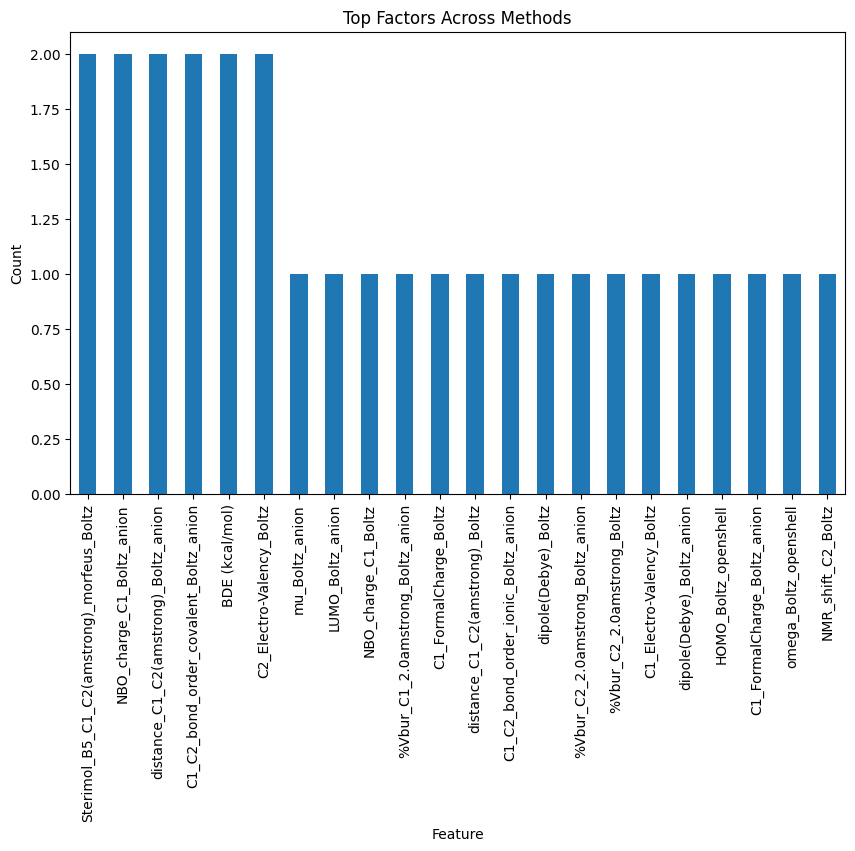

In [17]:
decision_tree_top_factors_count.plot(kind='bar', figsize=(10, 6), title="Top Factors Across Methods")
plt.xlabel("Feature")
plt.ylabel("Count")
plt.show()

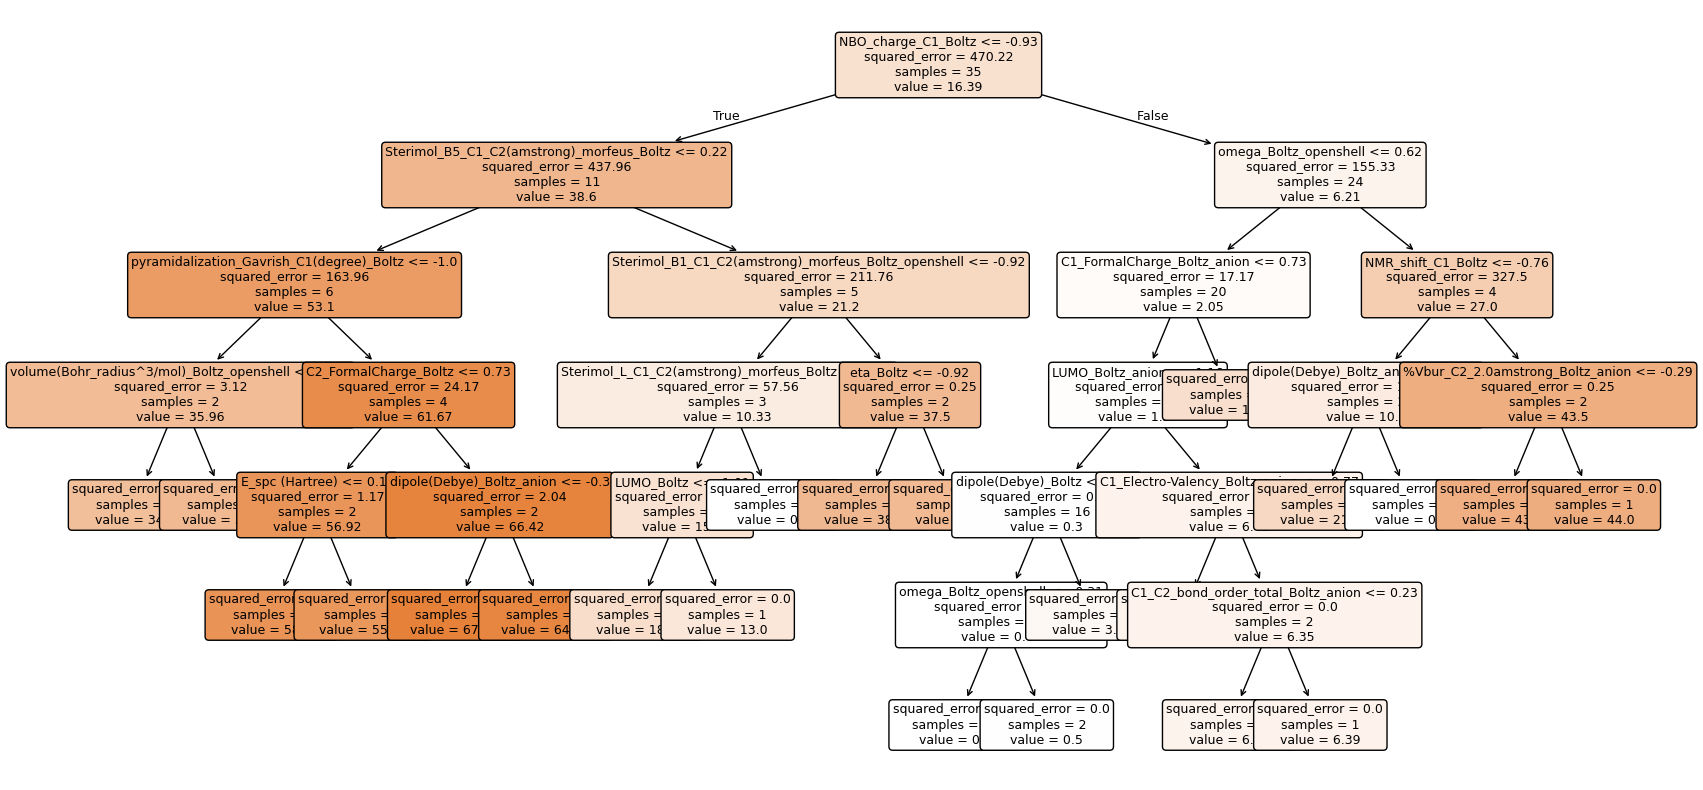

In [18]:
# visualize the decision tree model for the first method
method = yield_columns[0]
model = models[method]["model"]

plt.figure(figsize=(20, 10))
plot_tree(
    model,
    feature_names=decision_tree_X.columns,
    filled=True,
    fontsize=9,
    rounded=True,
    precision=2,
)
plt.show()

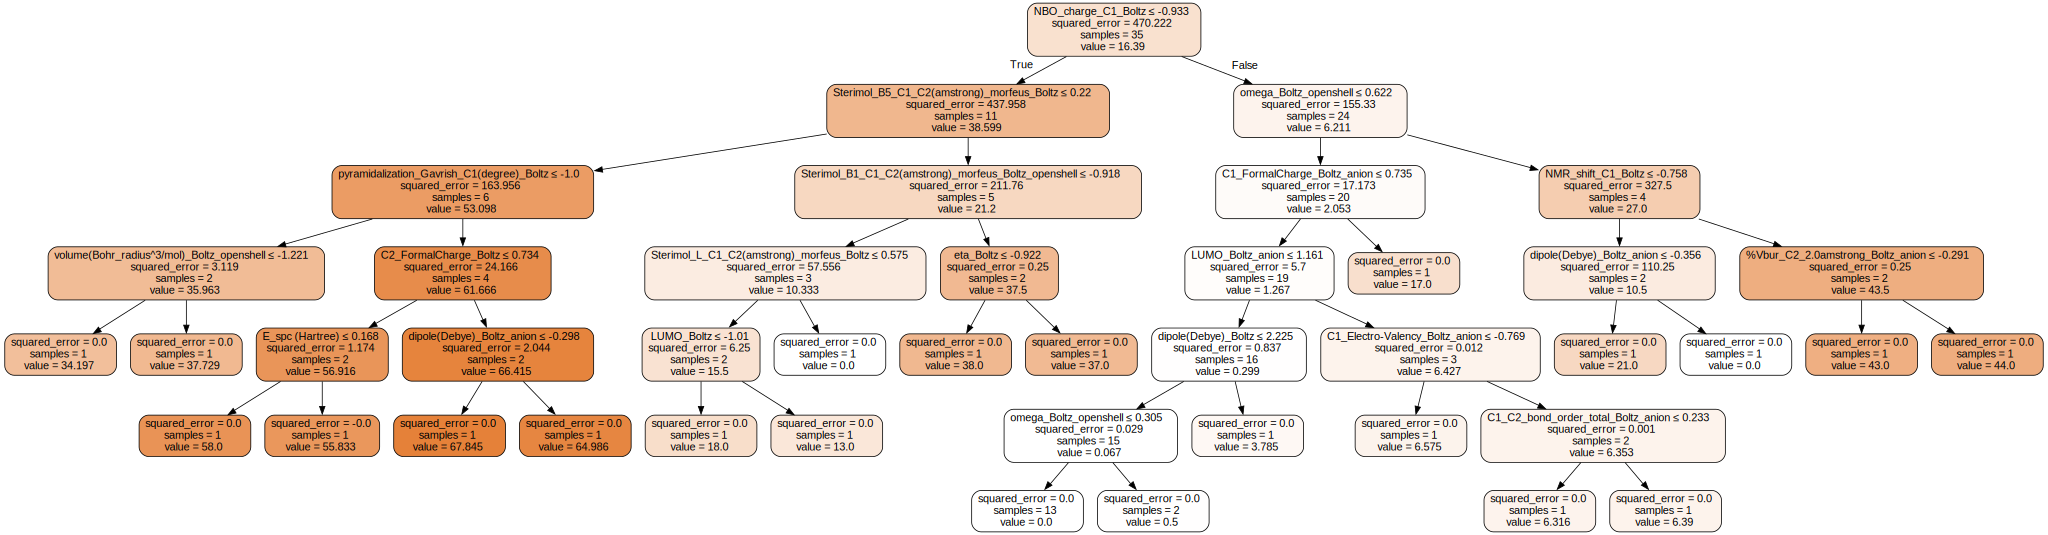

In [19]:
dot_data = export_graphviz(
    model,
    out_file=None,
    feature_names=decision_tree_X.columns,
    filled=True,
    rounded=True,
    special_characters=True,
)
graph = graphviz.Source(dot_data)
graph

In [20]:
# ok now do that for every method
os.makedirs("decision_trees", exist_ok=True)
# delete all files in the directory
for file in os.listdir("decision_trees"):
    os.remove(os.path.join("decision_trees", file))

for method, metrics in models.items():
    dot_data = export_graphviz(
        model,
        out_file=None,
        feature_names=decision_tree_X.columns,
        filled=True,
        rounded=True,
        special_characters=True,
    )
    graph = graphviz.Source(dot_data)
    graph.render(
        f"decision_trees/{method}",
        format="png",
        cleanup=True,
    )

In [21]:
select_properties_data_removed_highlycorr_normalized_df

,BDE (kcal/mol),E_spc (Hartree),HOMO_Boltz,HOMO_Boltz_anion,HOMO_Boltz_openshell,LUMO_Boltz,LUMO_Boltz_anion,LUMO_Boltz_openshell,mu_Boltz,mu_Boltz_anion,...,C1_Electro-Valency_Boltz,C1_Electro-Valency_Boltz_anion,C1_FormalCharge_Boltz,C1_FormalCharge_Boltz_anion,C2_Co-Valency_Boltz,C2_Co-Valency_Boltz_anion,C2_Electro-Valency_Boltz,C2_Electro-Valency_Boltz_anion,C2_FormalCharge_Boltz,C2_FormalCharge_Boltz_anion
0,0.954868,-0.614314,0.968695,-0.849995,0.109182,-0.367607,-0.614495,-0.560989,0.757287,-0.775692,...,0.869703,0.594303,-0.155124,0.083136,-0.335515,-0.089852,0.463224,0.479746,0.587720,1.086271
1,0.126965,-0.614277,1.041465,-0.045161,0.766708,-0.424292,-0.761957,-0.825373,0.784263,-0.644809,...,0.963294,1.359165,-0.908549,0.276491,1.029333,0.709430,-1.065461,-0.833133,-0.084925,0.368006
2,0.672053,-0.614290,0.997927,-1.237440,-0.262126,-0.602850,-0.448773,-0.248060,0.549499,-0.760294,...,1.014505,0.824809,1.692559,0.130820,1.176359,0.974444,-0.944075,-0.871471,1.031920,0.851779
3,1.401716,-0.820789,0.184404,-1.506928,-0.666487,-1.322043,-1.041376,-1.607323,-1.144162,-1.335438,...,0.920913,0.667646,0.320250,0.208371,-1.894548,-1.679229,2.039576,1.747777,0.147751,-0.202382
4,1.436249,-0.820782,0.101684,-0.100510,-1.563112,-1.416282,-1.901683,-0.969515,-1.338098,-1.605473,...,1.060418,0.207942,1.486264,-2.997447,-0.736092,-2.050956,0.805765,2.377091,-0.076464,0.230690
5,0.634543,-0.820696,0.114745,-1.652106,-0.575066,-1.536738,-0.922166,-1.664830,-1.446732,-1.282400,...,1.009207,0.650620,-0.083370,0.230903,-0.238977,-0.167590,0.136203,0.267081,-0.605274,0.194777
6,0.928075,-0.614288,1.361774,1.015550,0.371489,-0.502234,-1.587466,-0.276440,1.079542,-0.994686,...,0.862639,-0.086739,-0.002646,-3.105391,-0.537468,-1.694777,0.541376,1.958272,0.393118,0.629961
7,0.573812,-0.614290,1.437031,0.004744,0.939704,-0.437754,-0.882889,-0.915742,1.234108,-0.729213,...,0.833502,0.562870,-0.262757,-0.180959,-0.062545,-0.093386,0.198281,0.434175,0.063141,0.408144
8,0.149888,-0.614262,1.349957,0.627197,1.034641,-0.603559,-1.758356,-0.647624,0.961431,-1.258163,...,0.996846,0.035062,0.185710,-3.152550,1.338365,1.130625,-1.154144,-0.542347,1.569191,1.692572
9,-1.180831,-1.120079,0.993032,-0.553286,0.988930,-0.412530,-0.602436,-0.253288,0.739591,-0.672469,...,-1.077770,-0.615856,-1.050576,0.790009,-0.460252,-0.051690,0.484434,-0.003451,0.135107,0.036336


In [22]:
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(select_properties_data_removed_highlycorr_normalized_df)

# Get the most contributing factors for the first two principal components
pc1_contributions = abs(pca.components_[0])
pc2_contributions = abs(pca.components_[1])

pc1_top_factors = select_properties_data_removed_highlycorr_normalized_df.columns[
    pc1_contributions.argsort()[::-1][:3]
]
pc2_top_factors = select_properties_data_removed_highlycorr_normalized_df.columns[
    pc2_contributions.argsort()[::-1][:3]
]

print("Top factors for PC1:", pc1_top_factors)
print("Top factors for PC2:", pc2_top_factors)

Top factors for PC1: Index(['E_spc (Hartree)', 'polar_iso(Debye)_Boltz',
       'polar_aniso(Debye)_Boltz_openshell'],
      dtype='object')
Top factors for PC2: Index(['%Vbur_C1_2.0amstrong_Boltz_anion', 'NBO_charge_C1_Boltz_anion',
       'C1_Co-Valency_Boltz_anion'],
      dtype='object')


In [23]:
# Prepare PCA DataFrame
pca_df = select_properties_data_removed_highlycorr_normalized_df.copy()
pca_df["PC1"] = pca_result[:, 0]
pca_df["PC2"] = pca_result[:, 1]

# Get all yield methods
yield_columns = yields_df.select_dtypes(include=[np.number]).columns

# Create a subplot structure
fig = make_subplots(
    rows=len(yield_columns),
    cols=1,
    subplot_titles=[f"PCA Scatter Plot for {method}" for method in yield_columns],
    vertical_spacing = 0.01,
)

# Loop over each yield method
for i, yield_column in enumerate(yield_columns, start=1):
    pca_df["Yield"] = yields_df[yield_column]

    # Create scatter plot for the method
    scatter = px.scatter(
        pca_df,
        x="PC1",
        y="PC2",
        size="Yield",
        color="Yield",
        title=f"PCA Scatter Plot for {yield_column}",
        labels={
            "PC1": "Principal Component 1",
            "PC2": "Principal Component 2",
            "Yield": "Yield",
        },
        marginal_x = "histogram",
        marginal_y = "histogram",
        template="simple_white",
    )

    # Add trace to the subplot
    for trace in scatter.data:
        fig.add_trace(trace, row=i, col=1)

# Update layout for all plots
fig.update_layout(
    height=600 * len(yield_columns),
    width=1200,
    title="PCA Scatter Plots with Yield Sizes for All Methods",
    showlegend=False,
)

# Customize x and y axes for each subplot
for i in range(len(yield_columns)):
    fig.update_xaxes(
        title_text="Principal Component 1",
        showgrid=True,
        zeroline=True,
        zerolinewidth=2,
        zerolinecolor="black",
        gridcolor="lightgrey",
        row=i + 1,
        col=1,
    )
    fig.update_yaxes(
        title_text="Principal Component 2",
        showgrid=True,
        zeroline=True,
        zerolinewidth=2,
        zerolinecolor="black",
        gridcolor="lightgrey",
        row=i + 1,
        col=1,
    )

# Save the plots as an HTML file and open in the browser
output_file = "temp.html"
pio.write_html(fig, file=output_file, auto_open=True)

In [24]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score

# Binarize the yield data: 0 if yield < 50, 1 if yield >= 50
# classification_yields_df = yields_df.select_dtypes(include=np.number).applymap(lambda x: 0 if x < 50 else 1)
classification_yields_df = yields_df.select_dtypes(include=[np.number]).map(lambda x: 0 if x < 50 else 1)

# Prepare the feature dataset
X = select_properties_data_removed_highlycorr_normalized_df

# Store models and metrics
classification_models = {}

for method in classification_yields_df.columns:
    # Target variable
    y = classification_yields_df[method]
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)
    
    # Create and train the decision tree classifier
    clf = DecisionTreeClassifier(criterion="gini", random_state=random_seed)
    clf.fit(X_train, y_train)
    
    # Evaluate the classifier
    y_pred = clf.predict(X_test)
    display(pd.DataFrame({"Actual": y_test, "Predicted": y_pred}))
    report = classification_report(y_test, y_pred, output_dict=True)
    matrix = confusion_matrix(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Store the model and metrics
    classification_models[method] = {
        "model": clf,
        "classification_report": report,
        "confusion_matrix": matrix,
        "f1_score": f1,
    }
    
    print(f"Method: {method}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(matrix)
    print()

,Actual,Predicted
26,0,0
13,0,0
24,1,0
21,0,0
15,0,0
29,0,1
19,0,0


Method: Britton
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       0.00      0.00      0.00         1

    accuracy                           0.71         7
   macro avg       0.42      0.42      0.42         7
weighted avg       0.71      0.71      0.71         7

Confusion Matrix:
[[5 1]
 [1 0]]



,Actual,Predicted
26,0,0
13,1,0
24,0,0
21,0,0
15,1,0
29,0,0
19,0,0


Method: Maity2AP Stahl
Classification Report:
              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       0.00      0.00      0.00         2

    accuracy                           0.71         7
   macro avg       0.36      0.50      0.42         7
weighted avg       0.51      0.71      0.60         7

Confusion Matrix:
[[5 0]
 [2 0]]



c:\Users\R9000P\stahl_data_science\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\R9000P\stahl_data_science\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\R9000P\stahl_data_science\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\R9000P\stahl_data_science\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted sample

,Actual,Predicted
26,0,0
13,1,0
24,0,0
21,0,0
15,1,0
29,0,0
19,0,0


Method: Maity4AP Stahl
Classification Report:
              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       0.00      0.00      0.00         2

    accuracy                           0.71         7
   macro avg       0.36      0.50      0.42         7
weighted avg       0.51      0.71      0.60         7

Confusion Matrix:
[[5 0]
 [2 0]]



c:\Users\R9000P\stahl_data_science\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\R9000P\stahl_data_science\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\R9000P\stahl_data_science\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\R9000P\stahl_data_science\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted sample

,Actual,Predicted
26,0,0
13,0,0
24,1,0
21,0,0
15,0,1
29,0,1
19,1,0


Method: Golden Stahl
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.60      0.60         5
           1       0.00      0.00      0.00         2

    accuracy                           0.43         7
   macro avg       0.30      0.30      0.30         7
weighted avg       0.43      0.43      0.43         7

Confusion Matrix:
[[3 2]
 [2 0]]



,Actual,Predicted
26,0,0
13,0,1
24,0,1
21,0,0
15,0,1
29,0,1
19,0,0


Method: DeLuca
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.43      0.60         7
           1       0.00      0.00      0.00         0

    accuracy                           0.43         7
   macro avg       0.50      0.21      0.30         7
weighted avg       1.00      0.43      0.60         7

Confusion Matrix:
[[3 4]
 [0 0]]



c:\Users\R9000P\stahl_data_science\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

c:\Users\R9000P\stahl_data_science\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

c:\Users\R9000P\stahl_data_science\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

c:\Users\R9000P\stahl_data_science\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter

,Actual,Predicted
26,0,0
13,0,0
24,0,0
21,0,0
15,0,0
29,0,0
19,0,0


Method: Fujisaki
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7

Confusion Matrix:
[[7]]



c:\Users\R9000P\stahl_data_science\.venv\Lib\site-packages\sklearn\metrics\_classification.py:407: UserWarning:

A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.

c:\Users\R9000P\stahl_data_science\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.



,Actual,Predicted
26,0,0
13,1,0
24,1,0
21,1,0
15,1,0
29,1,0
19,1,0


c:\Users\R9000P\stahl_data_science\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\R9000P\stahl_data_science\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\R9000P\stahl_data_science\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Method: Newkome
Classification Report:
              precision    recall  f1-score   support

           0       0.14      1.00      0.25         1
           1       0.00      0.00      0.00         6

    accuracy                           0.14         7
   macro avg       0.07      0.50      0.12         7
weighted avg       0.02      0.14      0.04         7

Confusion Matrix:
[[1 0]
 [6 0]]



c:\Users\R9000P\stahl_data_science\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\R9000P\stahl_data_science\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\R9000P\stahl_data_science\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



,Actual,Predicted
26,0,0
13,1,1
24,0,0
21,0,0
15,1,1
29,0,0
19,0,0


Method: Xu Zhang
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         2

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7

Confusion Matrix:
[[5 0]
 [0 2]]



,Actual,Predicted
26,0,0
13,1,0
24,0,1
21,0,0
15,0,0
29,0,1
19,0,0


Method: Schreiner
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.00      0.00      0.00         1

    accuracy                           0.57         7
   macro avg       0.40      0.33      0.36         7
weighted avg       0.69      0.57      0.62         7

Confusion Matrix:
[[4 2]
 [1 0]]



,Actual,Predicted
26,0,0
13,1,0
24,0,0
21,0,0
15,0,0
29,0,0
19,0,0


Method: Chen
Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       0.00      0.00      0.00         1

    accuracy                           0.86         7
   macro avg       0.43      0.50      0.46         7
weighted avg       0.73      0.86      0.79         7

Confusion Matrix:
[[6 0]
 [1 0]]



c:\Users\R9000P\stahl_data_science\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\R9000P\stahl_data_science\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\R9000P\stahl_data_science\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\R9000P\stahl_data_science\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted sample

,Actual,Predicted
26,0,0
13,0,0
24,0,0
21,0,0
15,0,0
29,0,0
19,0,0


c:\Users\R9000P\stahl_data_science\.venv\Lib\site-packages\sklearn\metrics\_classification.py:407: UserWarning:

A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.

c:\Users\R9000P\stahl_data_science\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.



Method: Wu
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7

Confusion Matrix:
[[7]]



,Actual,Predicted
26,0,0
13,0,0
24,0,0
21,0,0
15,0,0
29,0,0
19,0,0


Method: Lopez Stahl
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7

Confusion Matrix:
[[7]]



c:\Users\R9000P\stahl_data_science\.venv\Lib\site-packages\sklearn\metrics\_classification.py:407: UserWarning:

A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.

c:\Users\R9000P\stahl_data_science\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.



,Actual,Predicted
26,0,0
13,1,0
24,0,0
21,0,0
15,1,0
29,0,0
19,0,0


Method: Ariarfard
Classification Report:
              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       0.00      0.00      0.00         2

    accuracy                           0.71         7
   macro avg       0.36      0.50      0.42         7
weighted avg       0.51      0.71      0.60         7

Confusion Matrix:
[[5 0]
 [2 0]]



c:\Users\R9000P\stahl_data_science\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\R9000P\stahl_data_science\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\R9000P\stahl_data_science\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\R9000P\stahl_data_science\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted sample

,Actual,Predicted
26,0,0
13,0,1
24,1,1
21,0,1
15,0,0
29,1,0
19,0,0


Method: Kanai
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.60      0.67         5
           1       0.33      0.50      0.40         2

    accuracy                           0.57         7
   macro avg       0.54      0.55      0.53         7
weighted avg       0.63      0.57      0.59         7

Confusion Matrix:
[[3 2]
 [1 1]]



In [25]:
# Visualize the decision tree for the first method
for method, metrics in classification_models.items():
    dot_data = export_graphviz(
        metrics["model"],
        out_file=None,
        feature_names=X.columns,
        class_names=["Below 50", "50 and Above"],
        filled=True,
        rounded=True,
        special_characters=True,
    )
    graph = graphviz.Source(dot_data)
    graph.render(
        f"decision_trees/{method}_classification",
        format="png",
        cleanup=True,
    )